# Exploratory Data Analysis
**Space Dataset from Maven Analytics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. **Reading Excel or csv**

In [2]:
baby = pd.read_excel('babynames.xlsx')
baby.head(3)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARAV,15,51
1,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARON,51,19
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDUL,20,46


In [3]:
sp = pd.read_csv('space_miss.csv')
sp.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


In [4]:
print(sp)

        Company                                         Location        Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05   
...         ...                                              ...         ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China  2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  2022-07-29   

          Time            Rocket       

2. **Understanding the Columns and Datatypes**

In [5]:
sp.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [8]:
sp.describe()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1962-04-26,12:00:00,Cosmos-3M (11K65M),Demo Flight,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


In [9]:
sp.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

- Entries in Time and Price are missing 
- Unique - 62 companies, 370 rockets and 4 Mission status

**Was unable to convert price to Float ($ sign or comma seaprators)**

**So they have to be removed and assigned to numeric or float**

In [10]:
sp['Price'] = sp['Price'].replace(',','',regex=True)

In [11]:
sp.loc[(sp['Company']=="NASA") & (sp['Rocket']=="Saturn V")]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
607,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1967-11-09,12:00:00,Saturn V,Apollo 4,Retired,1160.00,Success
640,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-04-04,12:00:00,Saturn V,Apollo 6,Retired,1160.00,Partial Failure
720,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-12-21,12:51:00,Saturn V,Apollo 8,Retired,1160.00,Success
739,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03,16:00:00,Saturn V,Apollo 9,Retired,1160.00,Success
763,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18,16:49:00,Saturn V,Apollo 10,Retired,1160.00,Success
778,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16,13:32:00,Saturn V,Apollo 11,Retired,1160.00,Success
812,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14,16:22:00,Saturn V,Apollo 12,Retired,1160.00,Success
848,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11,19:13:00,Saturn V,Apollo 13,Retired,1160.00,Success
939,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31,21:03:00,Saturn V,Apollo 14,Retired,1160.00,Success
995,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26,13:34:00,Saturn V,Apollo 15,Retired,1160.00,Success


In [12]:
sp = sp.astype( {'Company':object, 'Location':str, 'Date':object, 'Time':object, 'Rocket':object, 'Mission':object,
       'RocketStatus':object, 'Price':float ,'MissionStatus':object})

In [13]:
#sp['Price']= pd.to_numeric(sp['Price'],errors='coerce')

In [14]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4630 non-null   object 
 1   Location       4630 non-null   object 
 2   Date           4630 non-null   object 
 3   Time           4503 non-null   object 
 4   Rocket         4630 non-null   object 
 5   Mission        4630 non-null   object 
 6   RocketStatus   4630 non-null   object 
 7   Price          1265 non-null   float64
 8   MissionStatus  4630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 325.7+ KB


In [15]:
sp.loc[(sp['Company']=="NASA") & (sp['Rocket']=="Saturn V")]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
607,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1967-11-09,12:00:00,Saturn V,Apollo 4,Retired,1160.0,Success
640,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-04-04,12:00:00,Saturn V,Apollo 6,Retired,1160.0,Partial Failure
720,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-12-21,12:51:00,Saturn V,Apollo 8,Retired,1160.0,Success
739,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03,16:00:00,Saturn V,Apollo 9,Retired,1160.0,Success
763,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18,16:49:00,Saturn V,Apollo 10,Retired,1160.0,Success
778,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16,13:32:00,Saturn V,Apollo 11,Retired,1160.0,Success
812,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14,16:22:00,Saturn V,Apollo 12,Retired,1160.0,Success
848,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11,19:13:00,Saturn V,Apollo 13,Retired,1160.0,Success
939,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31,21:03:00,Saturn V,Apollo 14,Retired,1160.0,Success
995,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26,13:34:00,Saturn V,Apollo 15,Retired,1160.0,Success


In [16]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4630 non-null   object 
 1   Location       4630 non-null   object 
 2   Date           4630 non-null   object 
 3   Time           4503 non-null   object 
 4   Rocket         4630 non-null   object 
 5   Mission        4630 non-null   object 
 6   RocketStatus   4630 non-null   object 
 7   Price          1265 non-null   float64
 8   MissionStatus  4630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 325.7+ KB


In [17]:
sp['Date']= pd.to_datetime(sp['Date'])
sp['Time']= pd.to_datetime(sp['Time'])
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   datetime64[ns]
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   float64       
 8   MissionStatus  4630 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 325.7+ KB


In [18]:
sp.describe()

,Price
count,1265.000000
mean,128.303913
std,256.769663
min,2.500000
25%,30.000000
50%,63.230000
75%,115.000000
max,5000.000000


### Insights: Keep in mind the values for price attribute had more than 2000 null values. So the above stats doesnot provide the right understanding of the Price attribute

In [19]:
sp.isna()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,False,False,False,False,False
4626,False,False,False,False,False,False,False,True,False
4627,False,False,False,False,False,False,False,False,False
4628,False,False,False,False,False,False,False,True,False


**Count of Missing Values**

In [20]:
sp.isna().sum().sort_values(ascending=False)

Price            3365
Time              127
MissionStatus       0
RocketStatus        0
Mission             0
Rocket              0
Date                0
Location            0
Company             0
dtype: int64

In [21]:
Missing_percentage = (sp.isna().sum().sort_values(ascending=False)/len(sp))*100
Missing_percentage

Price            72.678186
Time              2.742981
MissionStatus     0.000000
RocketStatus      0.000000
Mission           0.000000
Rocket            0.000000
Date              0.000000
Location          0.000000
Company           0.000000
dtype: float64

In [22]:
md = Missing_percentage[Missing_percentage > 0]
md

Price    72.678186
Time      2.742981
dtype: float64

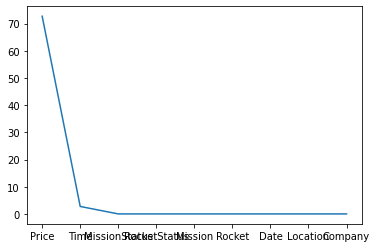

In [23]:
Missing_percentage.plot()

**Remove Coloumns if you dont need them**

Split the text column with delimter ,

In [24]:
sp.columns.get_loc("Location")

1

new_sp = sp.Location.str.split(expand=True)
print(new_sp)

In [25]:
sp.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,2023-06-23 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,2023-06-23 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,2023-06-23 16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,2023-06-23 03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,2023-06-23 07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,2023-06-23 18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,2023-06-23 12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,2023-06-23 17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,2023-06-23 09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,2023-06-23 02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


In [26]:
sp['Year']= sp['Date'].dt.year
sp['Month']= sp['Date'].dt.month
sp['Hour']= sp['Time'].dt.hour
print(sp)

        Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA 1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1958-02-05   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA 2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China 2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA 2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China 2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China 2022-07-29   

                    Time            Rocket         

In [27]:
sp.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus', 'Year', 'Month', 'Hour'],
      dtype='object')

In [28]:
columns = ['Company', 'Location', 'Date', 'Year', 'Month', 'Time','Hour', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus']
sp = sp[columns]
sp.head(5)

,Company,Location,Date,Year,Month,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,1957,10,2023-06-23 19:28:00,19.0,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,1957,11,2023-06-23 02:30:00,2.0,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,1957,12,2023-06-23 16:44:00,16.0,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,1958,2,2023-06-23 03:48:00,3.0,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,1958,2,2023-06-23 07:33:00,7.0,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


# Popular Company

In [29]:
pop_companies= sp.Company.value_counts()
pop_companies

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
                    ... 
Landspace              1
Sandia                 1
Firefly                1
Douglas                1
CAS Space              1
Name: Company, Length: 62, dtype: int64

**Top 10 companies**

In [30]:
pop_companies[:10]

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Name: Company, dtype: int64

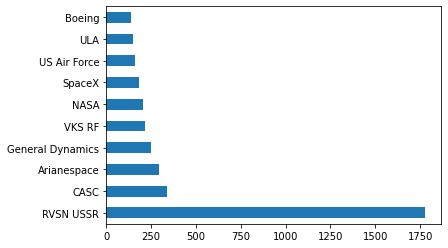

In [31]:
pop_companies[:10].plot(kind='barh')

In [32]:
pg_pop_companies= (sp.Company.value_counts())/(len(sp['Company']))*100
pg_pop_companies

RVSN USSR           38.380130
CASC                 7.300216
Arianespace          6.328294
General Dynamics     5.421166
VKS RF               4.665227
                      ...    
Landspace            0.021598
Sandia               0.021598
Firefly              0.021598
Douglas              0.021598
CAS Space            0.021598
Name: Company, Length: 62, dtype: float64

In [33]:
pg_pop_companies[:10]

RVSN USSR           38.380130
CASC                 7.300216
Arianespace          6.328294
General Dynamics     5.421166
VKS RF               4.665227
NASA                 4.384449
SpaceX               3.930886
US Air Force         3.477322
ULA                  3.261339
Boeing               2.937365
Name: Company, dtype: float64

### Insights : USSR dominates space launches by 38% . NASA is at 6th pos. with 4% (203) launches

# Popular Rockets

In [34]:
popular_rockets = sp.Rocket.value_counts()
popular_rockets

Cosmos-3M (11K65M)     446
Voskhod                299
Molniya-M /Block ML    128
Cosmos-2I (63SM)       126
Soyuz U                125
                      ... 
OS-M1                    1
Long March 6A            1
Scout X-2                1
Proton-M                 1
Atlas-SLV3 Burner-2      1
Name: Rocket, Length: 370, dtype: int64

**Top and Bottom 10 Rockets**

In [35]:
popular_rockets[:15]

Cosmos-3M (11K65M)      446
Voskhod                 299
Molniya-M /Block ML     128
Cosmos-2I (63SM)        126
Soyuz U                 125
Tsyklon-3               122
Falcon 9 Block 5        111
Tsyklon-2               106
Vostok-2M                93
Molniya-M /Block 2BL     87
Ariane 5 ECA             80
Delta II 7925            62
Atlas-SLV3 Agena-D       47
Vostok-2                 45
Long March 2D            44
Name: Rocket, dtype: int64

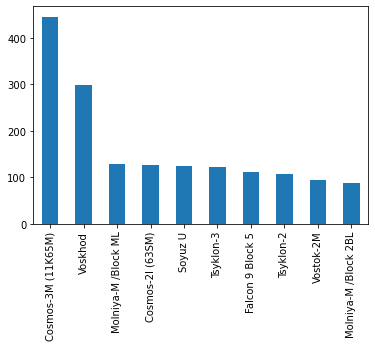

In [36]:
popular_rockets[:10].plot(kind='bar')

In [37]:
popular_rockets[-10:]  #Least Popular Rockets

Proton K/Block-DM      1
Delta II 7425-10C      1
Long March 2D/YZ-3     1
Long March 2C/SMA      1
Atlas V 511            1
OS-M1                  1
Long March 6A          1
Scout X-2              1
Proton-M               1
Atlas-SLV3 Burner-2    1
Name: Rocket, dtype: int64

**Count of date by year**

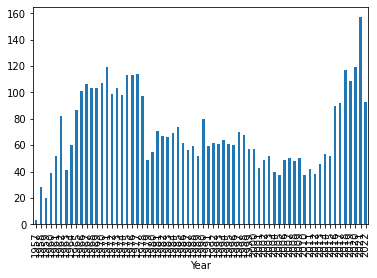

In [38]:
y_c = sp["Year"].groupby(sp["Year"]).count()
y_c.plot(kind="bar")

In [39]:
top_years = y_c.sort_values(ascending=False)[:10]
print(top_years)

Year
2021    157
1971    119
2020    119
2018    117
1977    114
1975    113
1976    113
2019    109
1970    107
1967    106
Name: Year, dtype: int64


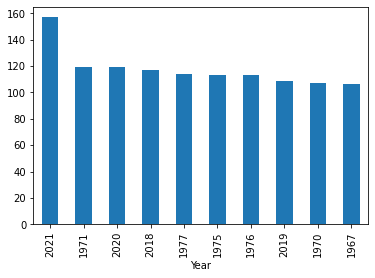

In [40]:
top_years.plot(kind='bar')

### Insights : In 1971  & 2020 we had made 119 launches

In [41]:
launchesin90 = (sp["Year"]).value_counts(bins=[1950,1999])
launchesin90

(1949.999, 1999.0]    3110
Name: Year, dtype: int64

In [42]:
launchesin2k = (sp["Year"]).value_counts(bins=[2000,2022])
launchesin2k

(1999.999, 2022.0]    1520
Name: Year, dtype: int64

In [43]:
launchin90_perc = (launchesin90/len(sp)) *100
launchin90_perc

(1949.999, 1999.0]    67.170626
Name: Year, dtype: float64

In [44]:
launchin2k_perc= (launchesin2k/len(sp))*100
launchin2k_perc

(1999.999, 2022.0]    32.829374
Name: Year, dtype: float64

### Insights: Space Industry was so active before 2000s

In [45]:
(sp["Year"]).value_counts(bins=12)

(2016.583, 2022.0]      687
(1967.833, 1973.25]     634
(1973.25, 1978.667]     535
(1962.417, 1967.833]    395
(1978.667, 1984.083]    377
(1994.917, 2000.333]    373
(1989.5, 1994.917]      326
(1984.083, 1989.5]      303
(2011.167, 2016.583]    279
(2005.75, 2011.167]     276
(1956.934, 1962.417]    224
(2000.333, 2005.75]     221
Name: Year, dtype: int64

### Insights: 1967-1973 was peak in Space race  with around634 launches.
### Stagnation is clearly visible from comparing launches in 1956-1962 and 2000-2005 ( last 2 entries)

In [46]:
launch_months = (sp["Month"]).value_counts()
launch_months

12    492
6     431
4     409
10    403
8     391
9     386
7     380
3     378
11    365
2     361
5     350
1     284
Name: Month, dtype: int64

### Insights: Most Launches happened in December, June, April

In [47]:
most_launch_hour = (sp["Hour"]).value_counts()
most_launch_hour

11.0    244
12.0    241
9.0     240
10.0    228
22.0    220
13.0    216
8.0     203
14.0    201
0.0     197
7.0     192
23.0    190
21.0    187
18.0    186
1.0     180
15.0    175
3.0     165
20.0    163
16.0    163
6.0     162
4.0     155
5.0     154
19.0    154
17.0    153
2.0     134
Name: Hour, dtype: int64

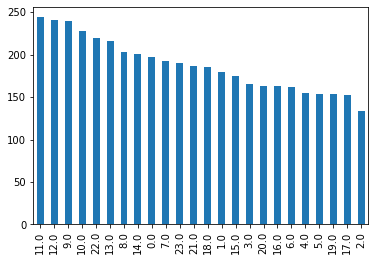

In [58]:
most_launch_hour.plot(kind='bar')

In [74]:
(sp["Hour"]).value_counts(bins=[0,6,12,24])

(12.0, 24.0]     2008
(6.0, 12.0]      1348
(-0.001, 6.0]    1147
Name: Hour, dtype: int64

In [75]:
(sp["Hour"]).value_counts(bins=[0,6,12,24],normalize=True)

(12.0, 24.0]     0.433693
(6.0, 12.0]      0.291145
(-0.001, 6.0]    0.247732
Name: Hour, dtype: float64

### Insights : 43% of launches took place after noon

In [78]:
(sp["Hour"]).value_counts(bins=[0,6,12,18,24])

(6.0, 12.0]      1348
(-0.001, 6.0]    1147
(12.0, 18.0]     1094
(18.0, 24.0]      914
Name: Hour, dtype: int64

### Insights : among 43% of launches after noon, most launches took place between 12-18 (12-6pm)

In [83]:
(sp["Hour"]).value_counts(bins=[0,3,6,9,12,15,18,21,24])

(9.0, 12.0]      713
(-0.001, 3.0]    676
(6.0, 9.0]       635
(12.0, 15.0]     592
(18.0, 21.0]     504
(15.0, 18.0]     502
(3.0, 6.0]       471
(21.0, 24.0]     410
Name: Hour, dtype: int64

### Insights: 410 launches took place after 9pm

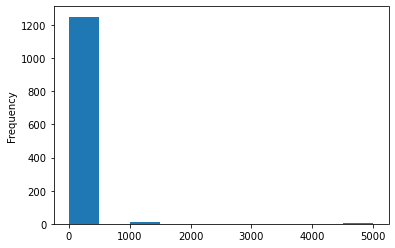

In [85]:
sp['Price'].plot(kind='hist')

In [86]:
notnullprice = sp['Price'][~sp['Price'].isnull()]
notnullprice

303     63.23
323     63.23
330     63.23
352     63.23
468     59.00
        ...  
4623    30.80
4624    67.00
4625    67.00
4627    67.00
4629    29.75
Name: Price, Length: 1265, dtype: float64

In [93]:
notnullprice.sort_values().tail(20)

3171     450.0
3174     450.0
2462     450.0
2401     450.0
2432     450.0
739     1160.0
720     1160.0
607     1160.0
1174    1160.0
763     1160.0
1143    1160.0
1080    1160.0
995     1160.0
939     1160.0
778     1160.0
812     1160.0
640     1160.0
848     1160.0
2407    5000.0
2323    5000.0
Name: Price, dtype: float64

### Insights:There were 2 launches with 5000M and 13 launches with 1160M

In [105]:
sp.loc[(sp['Price']==5000)]

,Company,Location,Date,Year,Month,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus
2323,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15,1987,5,2023-06-23 17:30:00,17.0,Energiya/Polyus,Polyus Space Station,Retired,5000.0,Success
2407,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15,1988,11,2023-06-23 03:00:00,3.0,Energiya/Buran,Buran,Retired,5000.0,Success


In [106]:
sp.loc[(sp['Price']==1160)]

,Company,Location,Date,Year,Month,Time,Hour,Rocket,Mission,RocketStatus,Price,MissionStatus
607,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1967-11-09,1967,11,2023-06-23 12:00:00,12.0,Saturn V,Apollo 4,Retired,1160.0,Success
640,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-04-04,1968,4,2023-06-23 12:00:00,12.0,Saturn V,Apollo 6,Retired,1160.0,Partial Failure
720,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-12-21,1968,12,2023-06-23 12:51:00,12.0,Saturn V,Apollo 8,Retired,1160.0,Success
739,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03,1969,3,2023-06-23 16:00:00,16.0,Saturn V,Apollo 9,Retired,1160.0,Success
763,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18,1969,5,2023-06-23 16:49:00,16.0,Saturn V,Apollo 10,Retired,1160.0,Success
778,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16,1969,7,2023-06-23 13:32:00,13.0,Saturn V,Apollo 11,Retired,1160.0,Success
812,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14,1969,11,2023-06-23 16:22:00,16.0,Saturn V,Apollo 12,Retired,1160.0,Success
848,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11,1970,4,2023-06-23 19:13:00,19.0,Saturn V,Apollo 13,Retired,1160.0,Success
939,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31,1971,1,2023-06-23 21:03:00,21.0,Saturn V,Apollo 14,Retired,1160.0,Success
995,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26,1971,7,2023-06-23 13:34:00,13.0,Saturn V,Apollo 15,Retired,1160.0,Success


### Insights : 5000M - Russia- Energia - polyus(1987),Buran(1988)
### 1160M - USA-NASA-Saturn V-Apollo(67-72), Skylab(73)

In [88]:
notnullprice.sum()

162304.45

In [91]:
sp['Price'].value_counts()

450.00    136
67.00     111
200.00     80
64.68      58
40.00      57
         ... 
135.00      2
55.00       1
15.00       1
20.14       1
28.30       1
Name: Price, Length: 65, dtype: int64

In [100]:
sp['Price'].value_counts(normalize=True).head(10)

450.00    0.107510
67.00     0.087747
200.00    0.063241
64.68     0.045850
40.00     0.045059
30.80     0.038735
29.75     0.034783
25.00     0.033992
29.15     0.032411
62.00     0.032411
Name: Price, dtype: float64

### Around 136 or 10% launches costed 450M

In [107]:
type(sp['Company']) # SERIES

type(sp) # DATAFRAME


pandas.core.frame.DataFrame

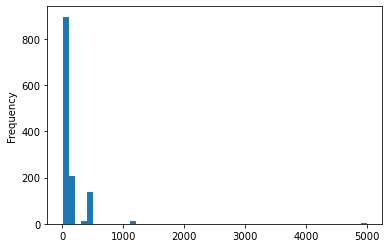

In [119]:
notnullprice.plot(kind='hist',bins=50)

In [122]:
notnullprice.mean()

128.30391304347756

### Insights: Average launch price 128M